# Logistic Regression #

- sigmoid function
- dependant variable is binary (0 or 1)
  

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

## Importing our data ##

In [122]:
data=pd.read_csv('heartdiseases.csv')

In [124]:
data

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,Female,Bachelor's Degree,65000,No,180,No
1,55,Male,High School Diploma,40000,Yes,245,Yes
2,30,Female,Master's Degree,80000,Yes,210,No
3,39,Male,Some College,50000,Yes,195,No
4,27,Male,Some College,30000,No,170,No
5,46,Female,Doctorate Degree,90000,No,200,Yes
6,35,Male,Some College,55000,No,190,No
7,48,Female,High School Diploma,42000,Yes,225,Yes
8,29,Male,Bachelor's Degree,70000,Yes,185,No
9,54,Female,Some College,48000,No,235,Yes


## Converting categorical variables to numeric variables ##

In [127]:
for column in ['Gender', 'Education', 'Smoker']:
    data[column], _ = pd.factorize(data[column])

In [129]:
data

,Age,Gender,Education,Income,Smoker,Cholesterol,Heart_Disease
0,42,0,0,65000,0,180,No
1,55,1,1,40000,1,245,Yes
2,30,0,2,80000,1,210,No
3,39,1,3,50000,1,195,No
4,27,1,3,30000,0,170,No
5,46,0,4,90000,0,200,Yes
6,35,1,3,55000,0,190,No
7,48,0,1,42000,1,225,Yes
8,29,1,0,70000,1,185,No
9,54,0,3,48000,0,235,Yes


## Splitting our Data ##

In [131]:
X=data.drop('Heart_Disease', axis=1) # features
y=data['Heart_Disease'] # label 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

## Training our Model ##

In [133]:
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train) #fitting

C:\Users\zaxar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Making predictions ##

In [140]:
y_pred=log_reg.predict(X_test)
y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes'], dtype=object)

## Accuracy Score ##

In [143]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [145]:
y_pred_proba=log_reg.predict_proba(X_test)[:,1]
y_pred_proba

array([0.44858712, 0.04267649, 0.94229622, 0.51896581, 0.50910125,
       0.15836508, 0.15836508, 0.90866166, 0.34806995, 0.40788767,
       0.52876993, 0.36085001, 0.49441179, 0.05223234, 0.68528177])

## ROC and AUC ##

In [150]:
y_test=y_test.map({'Yes':1, 'No':0})

In [152]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)
auc=roc_auc_score(y_test, y_pred_proba)

<function matplotlib.pyplot.show(close=None, block=None)>

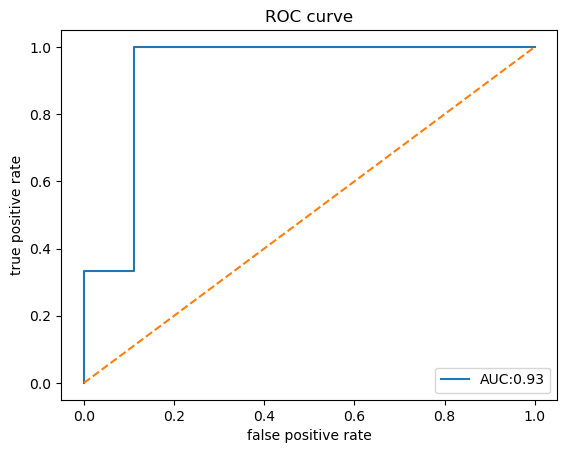

In [156]:
plt.plot(fpr, tpr, label=f'AUC:{auc:.2f}')
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show

In [158]:
odds_ratios=np.exp(log_reg.coef_)
odds_ratios

array([[1.30107847, 1.01664633, 1.22073175, 0.99995758, 1.04605447,
        0.96059057]])